In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set_style('whitegrid') # set style for visualization
warnings.filterwarnings('ignore')

### Baseline model 
|Simple forecasting methods|Description|
|--|--|
|Average|Overall historical mean|
|Naive|Naive forecast based on last observation, straight line|
|Seasonal Naive|Replicate the last seasonal cycle|

Reference https://otexts.com/fpp2/simple-methods.html

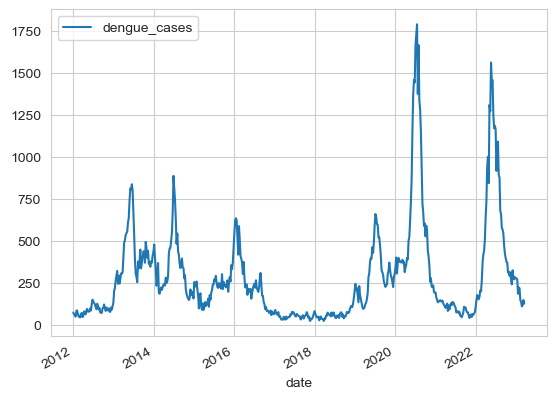

In [2]:
df = pd.read_csv('../datasets/dengue_merged_2012_2023.csv')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.set_index('date',inplace=True)
df.plot()
plt.show()

In [3]:
df.shape

(590, 1)

In [4]:
df.isna().sum()

dengue_cases    4
dtype: int64

In [7]:
df.dropna(how='all',inplace=True)

In [8]:
df.shape

(586, 1)

### Train baseline model
* 2012 to 2023 Dengue data

In [9]:
X = df.values
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,0]
test_X, test_y = test[:,0], test[:,0]

In [10]:
def baseline_snaive(history):
    '''
    Function to calculate seasonal naive forecast
    '''
    result = round(history[-52])
    history = np.append(history , result)
    return result,history


In [22]:
results = pd.DataFrame([], columns = ['Baseline Model', 'Test RMSE', 'Test MAPE'])

In [23]:
preds_average = list()
for x in test_X:
    y_pred = round(df.mean()['dengue_cases'])
    preds_average.append(y_pred)
rmse_average = mean_squared_error(test_y, preds_average, squared=False)
mape_average = mean_absolute_percentage_error(test_y, preds_average)
results = results.append({'Baseline Model': 'Average', 
                          'Test RMSE': rmse_average,
                          'Test MAPE': mape_average
                         }, ignore_index=True)
results

,Baseline Model,Test RMSE,Test MAPE
0,Average,449.313435,0.991806


In [24]:
preds_naive = list()
for x in test_X:
    y_pred = train_y[-1]
    preds_naive.append(y_pred)
test_score = mean_squared_error(test_y, preds_naive)
rmse_naive = mean_squared_error(test_y, preds_naive, squared=False)
mape_naive = mean_absolute_percentage_error(test_y, preds_naive)
results = results.append({'Baseline Model': 'Naive', 
                          'Test RMSE': rmse_naive,
                          'Test MAPE': mape_naive
                         }, ignore_index=True)
results

,Baseline Model,Test RMSE,Test MAPE
0,Average,449.313435,0.991806
1,Naive,438.082787,1.126150


In [25]:
preds_snaive = list()
history = train_y.copy()
for x in test_X:
    (y_pred,history) = baseline_snaive(history)
    preds_snaive.append(y_pred)
test_score = mean_squared_error(test_y, preds_snaive)
rmse_snaive = mean_squared_error(test_y, preds_snaive, squared=False)
mape_snaive = mean_absolute_percentage_error(test_y, preds_snaive)
results = results.append({'Baseline Model': 'Seasonal Naive', 
                          'Test RMSE': rmse_snaive,
                          'Test MAPE': mape_snaive
                         }, ignore_index=True)
results

,Baseline Model,Test RMSE,Test MAPE
0,Average,449.313435,0.991806
1,Naive,438.082787,1.126150
2,Seasonal Naive,397.380149,1.012788


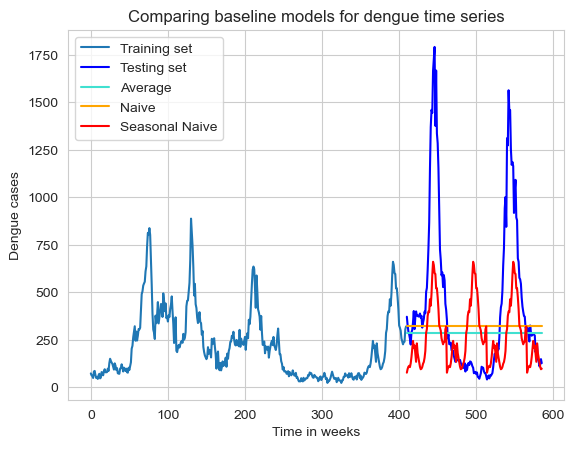

In [26]:
line1, = plt.plot(train_y, label='Training set')
line2, = plt.plot([None for i in train_y] + [x for x in test_y], label='Testing set',color='blue')
line3, = plt.plot([None for i in train_y] + [x for x in preds_average], label='Average',color='turquoise')
line4, = plt.plot([None for i in train_y] + [x for x in preds_naive], label='Naive',color='orange')
line5, = plt.plot([None for i in train_y] + [x for x in preds_snaive], label='Seasonal Naive',color='red')
plt.legend(handles=[line1, line2,line3,line4,line5])
plt.title('Comparing baseline models for dengue time series')
plt.xlabel('Time in weeks')
plt.ylabel('Dengue cases')
plt.show()

In [27]:
results

,Baseline Model,Test RMSE,Test MAPE
0,Average,449.313435,0.991806
1,Naive,438.082787,1.126150
2,Seasonal Naive,397.380149,1.012788


**Findings:**
* Seasonal Naive as a baseline model with test RMSE of 397 dengue cases